In [10]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input  # Correct import


In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Define the image size
IMAGE_SIZE = [224, 224]


In [11]:
# Set the paths to the training and validation data
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'


In [13]:
# Import the ResNet50 model
squeezernet = ResNet50(input_shape=IMAGE_SIZE + [3], include_top=False, weights='imagenet')


In [14]:
# Freeze all layers in the SENet model
for layer in squeezernet.layers:
    layer.trainable = False

In [15]:
# Get the folders in the training data directory
folders = glob('chest_xray/train/*')


In [16]:
# Add a flatten layer and a dense layer to the SENet model
x = Flatten()(squeezernet.output)
prediction = Dense(len(folders), activation='softmax')(x)


In [17]:
# Create a model object
model = Model(inputs=squeezernet.input, outputs=prediction)


In [18]:
# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [19]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [20]:
# Create image data generators for the training and validation data
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [21]:
# Generate training and validation data
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                target_size=(224, 224),
                                                batch_size=10,
                                                class_mode='categorical')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size=(224, 224),
                                            batch_size=10,
                                            class_mode='categorical')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [22]:
# Train the model
model.fit(
    training_set,
    validation_data=test_set,
    epochs=1,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

522/522 [==============================] - 228s 433ms/step - loss: 0.7045 - accuracy: 0.7922 - val_loss: 0.3434 - val_accuracy: 0.8478


In [23]:
# Perform predictions on a test image
img = image.load_img('chest_xray/test/Normal/IM-0001-0001.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)  # Use preprocess_input from the correct import
classes = model.predict(img_data)
result = int(classes[0][0])
if result == 0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

1/1 [==============================] - 1s 734ms/step
Person is Affected By PNEUMONIA


In [24]:
# Initialize an empty list to store true and predicted labels
true_labels = []
predicted_labels = []


In [27]:
# Loop through the test set and predict labels
for i in range(len(test_set)):
    batch = test_set[i]
    images, labels = batch
    predictions = model.predict(images)

    # Convert one-hot encoded labels to class labels
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(predictions, axis=1))


1/1 [==============================] - 0s 152ms/step


In [28]:
# Calculate the confusion matrix, accuracy, precision, recall, and F1-score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(true_labels, predicted_labels)


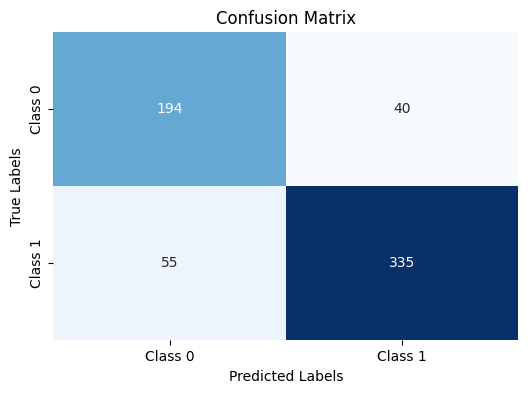

Accuracy   : 0.8477564102564102
Precision : 0.8933333333333333
Recall    : 0.8589743589743589
F1-score  : 0.8758169934640523


In [29]:
# Plot the confusion matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])  # Modify class labels accordingly
plt.yticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])  # Modify class labels accordingly
plt.show()

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy   :", accuracy)
precision = precision_score(true_labels, predicted_labels)
print("Precision :", precision)
recall = recall_score(true_labels, predicted_labels)
print("Recall    :", recall)
F1_score = f1_score(true_labels, predicted_labels)
print("F1-score  :", F1_score)
#Now, the preprocess_input function is correctly imported from tensorflow.keras.applications.resnet50.







In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet50 import preprocess_input  # Correct import


In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Define the image size
IMAGE_SIZE = [224, 224]


In [4]:
# Set the paths to the training and validation data
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'


In [5]:
# Import the ResNet50 model
squeezernet = ResNet50V2(input_shape=IMAGE_SIZE + [3], include_top=False, weights='/Users/hemu/Desktop/Updated_work_on_Deep_Learning/Research_work_on_Deep_Learning/Pneumonia/chest_xray/Pneumonia_models/resnet50v2_weights_tf_dim_ordering_tf_kernels_notop.h5')


In [6]:
# Freeze all layers in the SENet model
for layer in squeezernet.layers:
    layer.trainable = False

In [7]:
# Get the folders in the training data directory
folders = glob('chest_xray/train/*')


In [8]:
# Add a flatten layer and a dense layer to the SENet model
x = Flatten()(squeezernet.output)
prediction = Dense(len(folders), activation='softmax')(x)


In [9]:
# Create a model object
model = Model(inputs=squeezernet.input, outputs=prediction)


In [10]:
# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

In [11]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [12]:
# Create image data generators for the training and validation data
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [13]:
# Generate training and validation data
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                target_size=(224, 224),
                                                batch_size=10,
                                                class_mode='categorical')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size=(224, 224),
                                            batch_size=10,
                                            class_mode='categorical')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [20]:
# Train the model
model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
522/522 [==============================] - 308s 587ms/step - loss: 0.9745 - accuracy: 0.9795 - val_loss: 6.2684 - val_accuracy: 0.9391
Epoch 2/10
522/522 [==============================] - 251s 480ms/step - loss: 0.8780 - accuracy: 0.9827 - val_loss: 8.6688 - val_accuracy: 0.9167
Epoch 3/10
522/522 [==============================] - 249s 477ms/step - loss: 0.7660 - accuracy: 0.9856 - val_loss: 9.2734 - val_accuracy: 0.9279
Epoch 4/10
522/522 [==============================] - 251s 481ms/step - loss: 0.9482 - accuracy: 0.9814 - val_loss: 7.9431 - val_accuracy: 0.9343
Epoch 5/10
522/522 [==============================] - 253s 484ms/step - loss: 0.9094 - accuracy: 0.9822 - val_loss: 9.7783 - val_accuracy: 0.9183
Epoch 6/10
522/522 [==============================] - 279s 534ms/step - loss: 0.7596 - accuracy: 0.9858 - val_loss: 11.6482 - val_accuracy: 0.9119
Epoch 7/10
522/522 [==============================] - 286s 549ms/step - loss: 0.6079 - accuracy: 0.9887 - val_loss: 8.0958 

In [15]:
# Perform predictions on a test image
img = image.load_img('chest_xray/test/PNEUMONIA/person1625_virus_2817.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)  # Use preprocess_input from the correct import
classes = model.predict(img_data)
result = int(classes[0][0])
if result == 0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

1/1 [==============================] - 1s 840ms/step
Person is Affected By PNEUMONIA


In [16]:
# Initialize an empty list to store true and predicted labels
true_labels = []
predicted_labels = []


In [17]:
# Loop through the test set and predict labels
for i in range(len(test_set)):
    batch = test_set[i]
    images, labels = batch
    predictions = model.predict(images)

    # Convert one-hot encoded labels to class labels
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(predictions, axis=1))


1/1 [==============================] - 1s 572ms/step


In [18]:
# Calculate the confusion matrix, accuracy, precision, recall, and F1-score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(true_labels, predicted_labels)


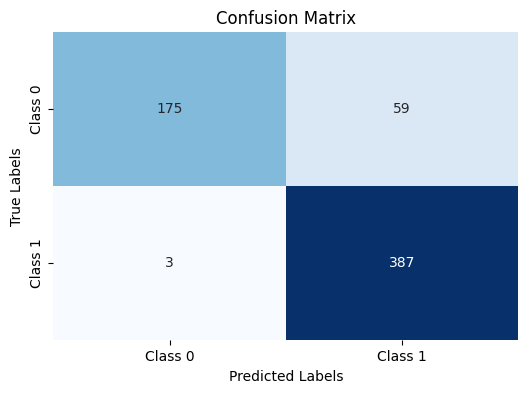

Accuracy   : 0.9006410256410257
Precision : 0.8677130044843049
Recall    : 0.9923076923076923
F1-score  : 0.9258373205741627


In [19]:
# Plot the confusion matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])  # Modify class labels accordingly
plt.yticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])  # Modify class labels accordingly
plt.show()

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy   :", accuracy)
precision = precision_score(true_labels, predicted_labels)
print("Precision :", precision)
recall = recall_score(true_labels, predicted_labels)
print("Recall    :", recall)
F1_score = f1_score(true_labels, predicted_labels)
print("F1-score  :", F1_score)
#Now, the preprocess_input function is correctly imported from tensorflow.keras.applications.resnet50.







In [2]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications.resnet50 import preprocess_input  # Correct import


In [3]:
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
# Define the image size
IMAGE_SIZE = [224, 224]


In [5]:
# Set the paths to the training and validation data
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'


In [7]:
# Import the ResNet50 model
squeezernet = ResNet152V2(input_shape=IMAGE_SIZE + [3], include_top=False, weights='/Users/hemu/Desktop/Updated_work_on_Deep_Learning/Research_work_on_Deep_Learning/Pneumonia/chest_xray/Pneumonia_models/resnet152v2_weights_tf_dim_ordering_tf_kernels_notop.h5')


In [8]:
# Freeze all layers in the SENet model
for layer in squeezernet.layers:
    layer.trainable = False

In [9]:
# Get the folders in the training data directory
folders = glob('chest_xray/train/*')


In [10]:
# Add a flatten layer and a dense layer to the SENet model
x = Flatten()(squeezernet.output)
prediction = Dense(len(folders), activation='softmax')(x)


In [11]:
# Create a model object
model = Model(inputs=squeezernet.input, outputs=prediction)


In [12]:
# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

In [13]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [14]:
# Create image data generators for the training and validation data
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [15]:
# Generate training and validation data
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                target_size=(224, 224),
                                                batch_size=10,
                                                class_mode='categorical')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size=(224, 224),
                                            batch_size=10,
                                            class_mode='categorical')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [16]:
# Train the model
model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
522/522 [==============================] - 536s 1s/step - loss: 2.1261 - accuracy: 0.9199 - val_loss: 5.3024 - val_accuracy: 0.8542
Epoch 2/10
522/522 [==============================] - 604s 1s/step - loss: 1.8326 - accuracy: 0.9477 - val_loss: 4.8082 - val_accuracy: 0.8926
Epoch 3/10
522/522 [==============================] - 672s 1s/step - loss: 1.6838 - accuracy: 0.9517 - val_loss: 5.4737 - val_accuracy: 0.8926
Epoch 4/10
522/522 [==============================] - 747s 1s/step - loss: 1.2682 - accuracy: 0.9645 - val_loss: 5.4861 - val_accuracy: 0.8910
Epoch 5/10
522/522 [==============================] - 675s 1s/step - loss: 1.4933 - accuracy: 0.9632 - val_loss: 6.7401 - val_accuracy: 0.8814
Epoch 6/10
522/522 [==============================] - 662s 1s/step - loss: 1.3135 - accuracy: 0.9684 - val_loss: 15.2187 - val_accuracy: 0.8109
Epoch 7/10
522/522 [==============================] - 633s 1s/step - loss: 1.1018 - accuracy: 0.9724 - val_loss: 15.7099 - val_accuracy: 0.81

In [17]:
# Perform predictions on a test image
img = image.load_img('chest_xray/test/PNEUMONIA/person1625_virus_2817.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)  # Use preprocess_input from the correct import
classes = model.predict(img_data)
result = int(classes[0][0])
if result == 0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

1/1 [==============================] - 1s 1s/step
Person is Affected By PNEUMONIA


In [18]:
# Initialize an empty list to store true and predicted labels
true_labels = []
predicted_labels = []


In [19]:
# Loop through the test set and predict labels
for i in range(len(test_set)):
    batch = test_set[i]
    images, labels = batch
    predictions = model.predict(images)

    # Convert one-hot encoded labels to class labels
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(predictions, axis=1))


1/1 [==============================] - 1s 504ms/step


In [20]:
# Calculate the confusion matrix, accuracy, precision, recall, and F1-score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(true_labels, predicted_labels)


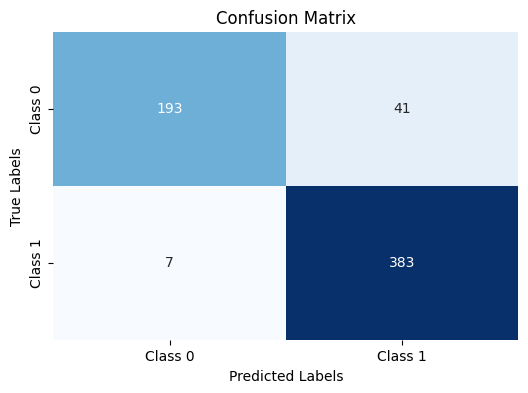

Accuracy   : 0.9230769230769231
Precision : 0.9033018867924528
Recall    : 0.982051282051282
F1-score  : 0.941031941031941


In [21]:
# Plot the confusion matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])  # Modify class labels accordingly
plt.yticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])  # Modify class labels accordingly
plt.show()

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy   :", accuracy)
precision = precision_score(true_labels, predicted_labels)
print("Precision :", precision)
recall = recall_score(true_labels, predicted_labels)
print("Recall    :", recall)
F1_score = f1_score(true_labels, predicted_labels)
print("F1-score  :", F1_score)
#Now, the preprocess_input function is correctly imported from tensorflow.keras.applications.resnet50.





